In [1]:
import collections
import operator
import pprint
with open('/home/gab/informationtheory/EE277_ME1_file2compress.txt', 'r') as info:
  count = collections.Counter(info.read().lower())
  value = pprint.pformat(count)
print(value)
total = sum(count.values())
print("total sum: ",total)

Counter({' ': 29604,
         'e': 19190,
         'i': 17197,
         'u': 15252,
         's': 14414,
         't': 13959,
         'a': 13548,
         'n': 10247,
         'l': 10000,
         'r': 9282,
         'm': 8033,
         'o': 7068,
         'c': 6889,
         'd': 4908,
         'p': 4123,
         '.': 3820,
         'v': 2923,
         ',': 2613,
         'q': 2255,
         'b': 2146,
         'g': 2108,
         'f': 1723,
         'h': 1021,
         '\n': 654,
         'x': 316,
         'j': 154,
         ';': 17})
total sum:  203464


[(' ', 0.14549994102150748),
 ('e', 0.09431643927181221),
 ('i', 0.08452109464082098),
 ('u', 0.07496166397986867),
 ('s', 0.07084299925293909),
 ('t', 0.06860673141194511),
 ('a', 0.06658671804348681),
 ('n', 0.05036271772893485),
 ('l', 0.04914874375810954),
 ('r', 0.045619863956277276),
 ('m', 0.039481185860889396),
 ('o', 0.03473833208823182),
 ('c', 0.03385856957496167),
 ('d', 0.024122203436480163),
 ('p', 0.020264027051468566),
 ('.', 0.018774820115597845),
 ('v', 0.014366177800495419),
 (',', 0.012842566743994024),
 ('q', 0.011083041717453702),
 ('b', 0.010547320410490307),
 ('g', 0.010360555184209492),
 ('f', 0.008468328549522274),
 ('h', 0.005018086737702984),
 ('\n', 0.003214327841780364),
 ('x', 0.0015531003027562617),
 ('j', 0.0007568906538748869),
 (';', 8.355286438878622e-05)]


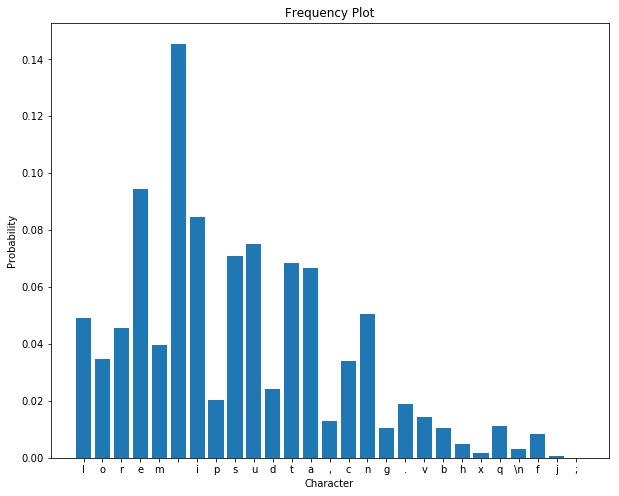

In [17]:
probability = {}
for key in count:
    probability[key] = count[key]/total
    
sort = sorted(probability.items(), key=lambda x: x[1], reverse=True)
print(pprint.pformat(sort))
    
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
plt.title("Frequency Plot")
plt.xlabel("Character")
plt.ylabel("Probability")
characters = ('l','o','r','e','m',' ','i','p','s','u','d','t','a',',','c',
'n','g','.','v','b','h','x','q','\\n','f','j',';')
plt.bar(range(len(probability)), list(probability.values()), align='center')
plt.xticks(range(len(probability)), characters)

plt.savefig('EE277_ME1_frequencyplot.png')
plt.show()

In [4]:
with open('/home/gab/informationtheory/EE277_ME1_file2compress.txt', 'r') as file:
    string = file.read().lower()

class NodeTree(object):
    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

    def children(self):
        return (self.left, self.right)

    def nodes(self):
        return (self.left, self.right)

    def __str__(self):
        return "%s_%s" % (self.left, self.right)

def huffmanCodeTree(node, left=True, binString=""):
    if type(node) is str:
        return {node: binString}
    (l, r) = node.children()
    d = dict()
    d.update(huffmanCodeTree(l, True, binString + "0"))
    d.update(huffmanCodeTree(r, False, binString + "1"))
    return d

freq = {}
for c in string:
    if c in freq:
        freq[c] += 1
    else:
        freq[c] = 1

freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)

nodes = freq

while len(nodes) > 1:
    key1, c1 = nodes[-1]
    key2, c2 = nodes[-2]
    nodes = nodes[:-2]
    node = NodeTree(key1, key2)
    nodes.append((node, c1 + c2))
    nodes = sorted(nodes, key=lambda x: x[1], reverse=True)

huffmanCode = huffmanCodeTree(nodes[0][0])

print (" Char |   Prob   |  Codeword  |  d ")
print ("------------------------------------")

sum = 0
for char, frequency in freq:
    prob = frequency/total
    codelen = len(str((huffmanCode[char])))
    sum = sum + (prob*codelen)
    print (" %-4r | %6f | %10s | %2d" % (char, prob, huffmanCode[char], codelen))
print ("------------------------------------")    

print("average codeword length: ", "%6f" % (sum))


 Char |   Prob   |  Codeword  |  d 
------------------------------------
 ' '  | 0.145500 |        101 |  3
 'e'  | 0.094316 |        001 |  3
 'i'  | 0.084521 |       1111 |  4
 'u'  | 0.074962 |       1101 |  4
 's'  | 0.070843 |       1100 |  4
 't'  | 0.068607 |       1001 |  4
 'a'  | 0.066587 |       0111 |  4
 'n'  | 0.050363 |       0101 |  4
 'l'  | 0.049149 |       0100 |  4
 'r'  | 0.045620 |       0001 |  4
 'm'  | 0.039481 |      11101 |  5
 'o'  | 0.034738 |      10001 |  5
 'c'  | 0.033859 |      10000 |  5
 'd'  | 0.024122 |      01100 |  5
 'p'  | 0.020264 |     111001 |  6
 '.'  | 0.018775 |     011011 |  6
 'v'  | 0.014366 |     011010 |  6
 ','  | 0.012843 |     000011 |  6
 'q'  | 0.011083 |     000010 |  6
 'b'  | 0.010547 |     000000 |  6
 'g'  | 0.010361 |    1110001 |  7
 'f'  | 0.008468 |    1110000 |  7
 'h'  | 0.005018 |    0000010 |  7
 '\n' | 0.003214 |   00000111 |  8
 'x'  | 0.001553 |  000001101 |  9
 'j'  | 0.000757 | 0000011001 | 10
 ';'  | 0.000084 

In [32]:
from bitarray import bitarray

#Dictionary
huffman_dict = {
    ' ': bitarray('101'), 'e': bitarray('001'),'i': bitarray('1111'), 'u': bitarray('1101'),
    's': bitarray('1100'), 't': bitarray('1001'),'a': bitarray('0111'), 'n': bitarray('0101'),
    'l': bitarray('0100'), 'r': bitarray('0001'),'m': bitarray('11101'), 'o': bitarray('10001'),
    'c': bitarray('10000'), 'd': bitarray('01100'),'p': bitarray('111001'), '.': bitarray('011011'),
    'v': bitarray('011010'), ',': bitarray('000011'),'q': bitarray('000010'), 'b': bitarray('000000'),
    'g': bitarray('1110001'), 'f': bitarray('1110000'),'h': bitarray('0000010'), '\n': bitarray('00000111'),
    'x': bitarray('000001101'), 'j': bitarray('0000011001'),';': bitarray('0000011000')}

#Encoder
encoded = bitarray()
encoded.encode(huffman_dict, string)
print(encoded)

encoded_file = open("EE277_ME1_encoder_out.txt", "w")
encoded_file.write(str(encoded))
encoded_file.close()

bitarray('010010001000100111101101111111100111001101111011010110010001010010001000110111001111100110101111110100110010000111011000010001010111000011000010010011001110100011010111011001111111001111111001000011110101111000110100101001111100101101110101101011110110100111111011101110010110000100010101011001111111010010101100111011110110111000111111000111111001100111111100101010001111000011011100000011101010001111000100010010011001101010011011000010011101110010101001111111000111010100011110101000111100010001001001100110111011001011011101011010001110010011111000000110101001101111011011101010001000111111011000010001000111100100100011010111100001000011011110111000111010110101101000101001111100110101101000101001010110100010000010111110000110101000111011011101111001000110001111101011011001001111011110011000100011010100011110000110111001010111000110000110101101110101011101010110000101011110011010010100111110011011000010001010101100111111101001010110011101111010000111011100001111011110010010001101

In [31]:
#Decoder
dec = bitarray(encoded).decode(huffman_dict)
print(''.join(dec))

decoded_file = open("EE277_ME1_decoder_out.txt", "w")
decoded_file.write(''.join(dec))
decoded_file.close()


lorem ipsum dolor sit amet, consectetur adipiscing elit. vivamus condimentum sagittis lacus, laoreet luctus ligula laoreet ut. vestibulum ullamcorper accumsan velit vel vehicula. proin tempor lacus arcu. nunc at elit condimentum, semper nisi et, condimentum mi. in venenatis blandit nibh at sollicitudin. vestibulum dapibus mauris at orci maximus pellentesque. nullam id elementum ipsum. suspendisse cursus lobortis viverra. proin et erat at mauris tincidunt porttitor vitae ac dui.

donec vulputate lorem tortor, nec fermentum nibh bibendum vel. lorem ipsum dolor sit amet, consectetur adipiscing elit. praesent dictum luctus massa, non euismod lacus. pellentesque condimentum dolor est, ut dapibus lectus luctus ac. ut sagittis commodo arcu. integer nisi nulla, facilisis sit amet nulla quis, eleifend suscipit purus. class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. aliquam euismod ultrices lorem, sit amet imperdiet est tincidunt vel. phasellus dictum j